# Analysis of Netflix Titles dataset

#### Loading the dataset

In [13]:
# Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Setting color palette

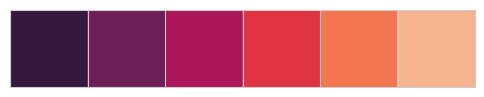

In [14]:
palette = sns.color_palette(palette='rocket')
sns.set_palette(palette)
sns.palplot(palette)

sns.set_style('whitegrid')

#### Quantity comparison of films and series

<Axes: xlabel='type', ylabel='quantity'>

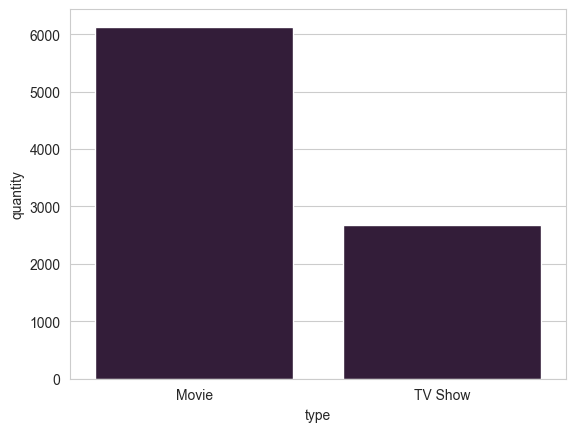

In [15]:
quantity = df.groupby('type').size().reset_index(name='quantity')
sns.barplot(data=quantity, x='type', y='quantity')

#### Percentage comparision of movies and series

[Text(0, 0, '69.62%'), Text(0, 0, '30.38%')]

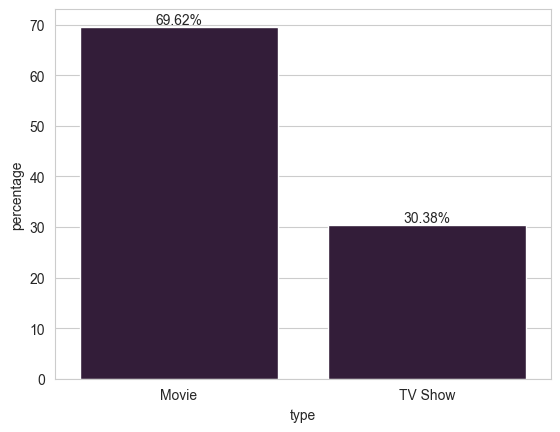

In [16]:
quantity['percentage'] = quantity['quantity'] / quantity['quantity'].sum() * 100
ax = sns.barplot(data=quantity, x='type', y='percentage')
ax.bar_label(ax.containers[0], fmt='%.2f%%')


#### Top 5 most popular directors

In [17]:
directors = df.groupby('director').size().reset_index(name='quantity')
top_directors = directors.nlargest(10, 'quantity')
ax1 = sns.barplot(data=top_directors, x='quantity', y='director')
ax1.xaxis.set_major_locator(plt.MultipleLocator(1))

,director,quantity
3392,Rajiv Chilaka,19
3443,"Raúl Campos, Jan Suter",18
2598,Marcus Raboy,16
4046,Suhas Kadav,16
1790,Jay Karas,14
685,Cathy Garcia-Molina,13
1787,Jay Chapman,12
2671,Martin Scorsese,12
4480,Youssef Chahine,12
4020,Steven Spielberg,11


#### Top 15 most popular actors and actresses

                actor  quantity
0         Anupam Kher        39
1        Rupa Bhimani        31
2    Takahiro Sakurai        30
3       Julie Tejwani        28
4             Om Puri        27
5      Shah Rukh Khan        26
6         Rajesh Kava        26
7         Boman Irani        25
8        Paresh Rawal        25
9       Andrea Libman        25
10          Yuki Kaji        25
11       Vincent Tong        24
12       Akshay Kumar        23
13     Jigna Bhardwaj        23
14    Fred Tatasciore        21

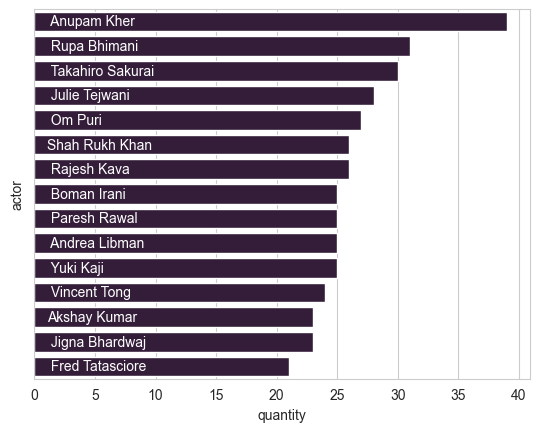

In [18]:
actors = df.cast.str.split(',')
actors = actors.explode('cast')
top15_actors = actors.value_counts()
top15_actors = top15_actors.head(15)
top15_actors = top15_actors.reset_index()
top15_actors.columns = ['actor', 'quantity']
ax2 = sns.barplot(data=top15_actors, x='quantity', y='actor')

ax2.set_yticklabels([])
ax2.tick_params(axis='y', length=0)

for i, value in enumerate(top15_actors['actor']):
    ax2.text(1, i, f'{value}', va='center', ha='left', color='white')

top15_actors

#### Top 15 most popular actors from USA movies

In [19]:
actors_usa = df[(df.country == 'United States') & (df.type == 'Movie')].cast.str.split(',')
actors_usa = actors_usa.explode('cast')
top15_actors_usa = actors_usa.value_counts()
top15_actors_usa = top15_actors_usa.head(15)
top15_actors_usa

cast
Adam Sandler          20
 Samuel L. Jackson    12
 Molly Shannon        12
 Ray Liotta           11
 Erin Fitzgerald      11
 Steve Buscemi        10
Nicolas Cage          10
 Michael Peña         10
 David Koechner       10
 Danny McBride        10
 Fred Tatasciore      10
 Danny Trejo          10
 Kate Higgins          9
 Woody Harrelson       9
Kevin Hart             9
Name: count, dtype: int64

#### Quantity comparison of movie and series genres

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ' International Movies'),
  Text(1, 0, 'Dramas'),
  Text(2, 0, 'Comedies'),
  Text(3, 0, 'Action & Adventure'),
  Text(4, 0, 'Documentaries'),
  Text(5, 0, ' Dramas'),
  Text(6, 0, 'International TV Shows'),
  Text(7, 0, ' Independent Movies'),
  Text(8, 0, ' TV Dramas'),
  Text(9, 0, ' Romantic Movies')])

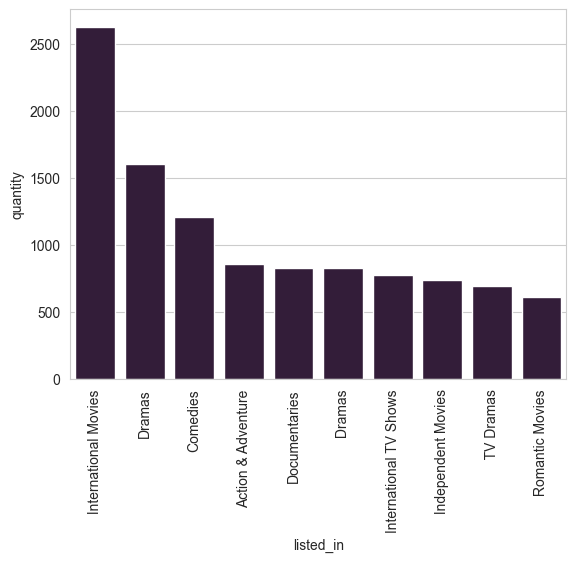

In [20]:
genre = df['listed_in'].copy()
genre = genre.str.split(',')
genre = genre.explode('listed_in')
genres = genre.value_counts().reset_index(name='quantity')
sns.barplot(data=genres.head(10), x='listed_in', y='quantity')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sci-Fi & Fantasy'),
  Text(1, 0, 'Cult Movies'),
  Text(2, 0, 'TV Horror'),
  Text(3, 0, ' Stand-Up Comedy'),
  Text(4, 0, ' Classic & Cult TV'),
  Text(5, 0, 'Romantic Movies'),
  Text(6, 0, 'Spanish-Language TV Shows'),
  Text(7, 0, 'LGBTQ Movies'),
  Text(8, 0, 'TV Sci-Fi & Fantasy'),
  Text(9, 0, 'Sports Movies')])

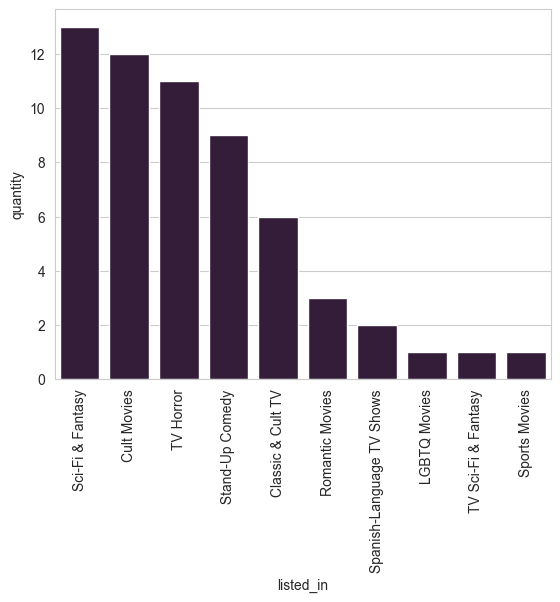

In [21]:
sns.barplot(data=genres.tail(10), x='listed_in', y='quantity')
plt.xticks(rotation=90) 

#### Quantity of movies and series released in each year (2000 - ...)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019'),
  Text(20, 0, '2020'),
  Text(21, 0, '2021')])

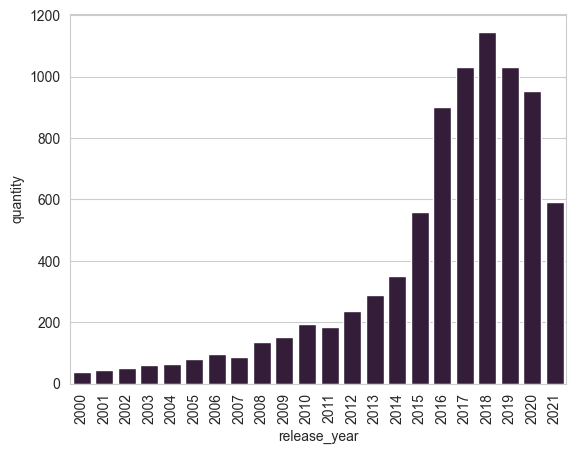

In [22]:
years = df.groupby('release_year').size().reset_index(name='quantity')
years = years[years['release_year'] >= 2000]
sns.barplot(data=years, x='release_year', y='quantity')
plt.xticks(rotation=90)

In [23]:
# Co 3 lata
bins = list(range(2000, 2021, 3))


#### Percentage of movies vs films through years (2000 - ...)

<Axes: xlabel='release_year', ylabel='percentage'>

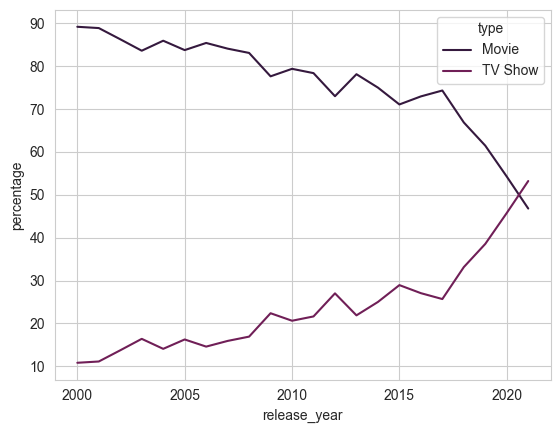

In [24]:
titles_per_year = df[df['release_year'] >= 2000].groupby(['release_year', 'type']).size().reset_index(name='quantity')
titles_per_year['percentage'] = titles_per_year['quantity'] / titles_per_year.groupby('release_year')['quantity'].transform('sum') * 100
titles_per_year
sns.lineplot(data=titles_per_year, x='release_year', y='percentage', hue='type')